In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout 
from tensorflow.keras import regularizers



In [3]:
data = pd.read_csv(r"E:/python/Baselweather.csv")

In [4]:
data.head(12)

,,Basel,Basel.1,Basel.2,Basel.3
0,lat( v? ??0,47.75,47.75,47.75,47.75
1,lon( kinh ??),7.5,7.5,7.5,7.5
2,asl(above sea level),363.653,363.653,363.653,363.653
3,variable,Temperature,Relative Humidity,Wind Speed,Wind Direction
4,unit,°C,%,km/h,°
5,level,2 m elevation corrected,2 m,10 m,10 m
6,resolution,hourly,hourly,hourly,hourly
7,aggregation,None,None,None,None
8,timestamp,Basel Temperature [2 m elevation corrected],Basel Relative Humidity [2 m],Basel Wind Speed [10 m],Basel Wind Direction [10 m]
9,20220101T0000,6.0602455,94.19782,3.9763298,174.80557


In [5]:
file_path = 'E:/python/Baselweather.csv'
data=pd.read_csv(file_path, delimiter=',',header=9,skipinitialspace=True)
data.head(10)

,timestamp,Basel Temperature [2 m elevation corrected],Basel Relative Humidity [2 m],Basel Wind Speed [10 m],Basel Wind Direction [10 m]
0,20220101T0000,6.060245,94.197820,3.976330,174.80557
1,20220101T0100,5.560245,94.832620,4.320000,180.00000
2,20220101T0200,4.630245,96.472030,3.259939,173.65980
3,20220101T0300,3.660245,97.118700,3.545589,156.03750
4,20220101T0400,3.880245,96.165750,3.671294,168.69006
5,20220101T0500,3.650245,96.980194,4.349896,155.55605
6,20220101T0600,3.110245,97.793210,5.191994,146.30994
7,20220101T0700,2.730246,98.201126,5.400000,143.13010
8,20220101T0800,2.510245,98.194110,5.351785,137.72632
9,20220101T0900,2.440245,97.839990,5.495161,148.39250


In [6]:
data.describe()

,Basel Temperature [2 m elevation corrected],Basel Relative Humidity [2 m],Basel Wind Speed [10 m],Basel Wind Direction [10 m]
count,9817.000000,9817.000000,9817.000000,9817.000000
mean,11.799285,74.641635,7.625690,161.268421
std,8.623915,18.992412,4.594623,93.266287
min,-7.199755,15.757724,0.000000,1.193466
25%,5.150245,63.357872,4.680000,78.690060
50%,11.270246,80.369680,6.489992,161.565050
75%,17.860245,89.836975,9.387651,228.366470
max,37.640247,100.064470,34.802895,360.000000


In [7]:
# Chọn cột cần phân tích
cols = ['Basel Temperature [2 m elevation corrected]','Basel Wind Speed [10 m]']
df = data[cols]

In [8]:
# Chuẩn bị dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [107]:
look_back =  70 #số lượng quan sát trước đó để dự đoán quan sát hiện tại
train_size = int(len(scaled_data) * 0.65)
val_size = int(len(scaled_data) * 0.15)
train_data = scaled_data[:train_size, :]
val_data = scaled_data[train_size:train_size+val_size, :]
test_data = scaled_data[train_size+val_size:, :]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), :])
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

X_train, Y_train = create_dataset(train_data, look_back)
X_val, Y_val = create_dataset(val_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [108]:
train_data.shape

(6505, 2)

In [109]:
# Xây dựng mô hình RNN
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, 2)))
#model.add(Dropout(0.3)) # Thêm layer dropout
model.add(Dense(2, kernel_regularizer=regularizers.l2(0.01)))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=60, batch_size=64, verbose=2)


Epoch 1/60
101/101 - 36s - loss: 0.0541 - 36s/epoch - 361ms/step
Epoch 2/60
101/101 - 6s - loss: 0.0261 - 6s/epoch - 57ms/step
Epoch 3/60
101/101 - 6s - loss: 0.0159 - 6s/epoch - 64ms/step
Epoch 4/60
101/101 - 7s - loss: 0.0093 - 7s/epoch - 70ms/step
Epoch 5/60
101/101 - 9s - loss: 0.0067 - 9s/epoch - 92ms/step
Epoch 6/60
101/101 - 12s - loss: 0.0057 - 12s/epoch - 115ms/step
Epoch 7/60
101/101 - 10s - loss: 0.0051 - 10s/epoch - 95ms/step
Epoch 8/60
101/101 - 13s - loss: 0.0046 - 13s/epoch - 132ms/step
Epoch 9/60
101/101 - 25s - loss: 0.0044 - 25s/epoch - 251ms/step
Epoch 10/60
101/101 - 19s - loss: 0.0042 - 19s/epoch - 187ms/step
Epoch 11/60
101/101 - 26s - loss: 0.0040 - 26s/epoch - 257ms/step
Epoch 12/60
101/101 - 22s - loss: 0.0040 - 22s/epoch - 213ms/step
Epoch 13/60
101/101 - 24s - loss: 0.0038 - 24s/epoch - 233ms/step
Epoch 14/60
101/101 - 18s - loss: 0.0037 - 18s/epoch - 179ms/step
Epoch 15/60
101/101 - 11s - loss: 0.0036 - 11s/epoch - 110ms/step
Epoch 16/60
101/101 - 10s - loss

In [110]:
# Đánh giá mô hình và dự đoán dữ liệu cho tương lai
test_data = scaled_data[train_size - look_back:, :]
X_test, Y_test = create_dataset(test_data, look_back)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train)
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test)

110/110 [==============================] - 3s 26ms/step


In [111]:
# Sử dụng EarlyStopping để dừng quá trình huấn luyện khi giá trị validation loss không giảm trong 10 lần lặp gần nhất
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [112]:
# Huấn luyện mô hình với EarlyStopping
history = model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=2, validation_data=(X_val, Y_val), callbacks=[early_stop])


Epoch 1/100
101/101 - 12s - loss: 65.3400 - val_loss: 121.9205 - 12s/epoch - 116ms/step
Epoch 2/100
101/101 - 9s - loss: 50.8363 - val_loss: 120.7177 - 9s/epoch - 92ms/step
Epoch 3/100
101/101 - 9s - loss: 50.4562 - val_loss: 111.9902 - 9s/epoch - 86ms/step
Epoch 4/100
101/101 - 9s - loss: 48.7718 - val_loss: 97.9863 - 9s/epoch - 84ms/step
Epoch 5/100
101/101 - 9s - loss: 35.3443 - val_loss: 56.7586 - 9s/epoch - 89ms/step
Epoch 6/100
101/101 - 9s - loss: 26.6596 - val_loss: 120.7387 - 9s/epoch - 86ms/step
Epoch 7/100
101/101 - 9s - loss: 21.6412 - val_loss: 96.8711 - 9s/epoch - 85ms/step
Epoch 8/100
101/101 - 8s - loss: 17.5397 - val_loss: 102.7546 - 8s/epoch - 84ms/step
Epoch 9/100
101/101 - 8s - loss: 11.9708 - val_loss: 106.4463 - 8s/epoch - 81ms/step
Epoch 10/100
101/101 - 8s - loss: 10.1836 - val_loss: 101.2329 - 8s/epoch - 78ms/step
Epoch 11/100
101/101 - 8s - loss: 8.5365 - val_loss: 109.5656 - 8s/epoch - 76ms/step
Epoch 12/100
101/101 - 8s - loss: 6.7975 - val_loss: 98.6208 - 8

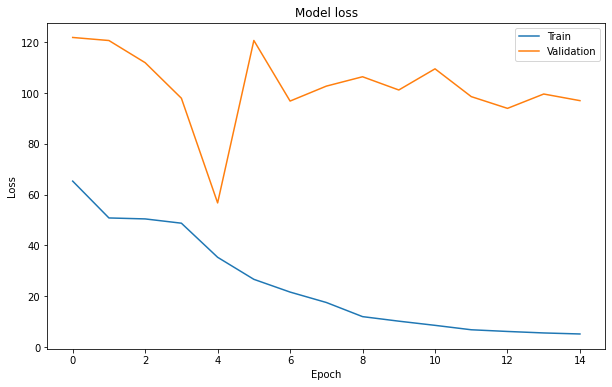

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (4988,) and (3502,)

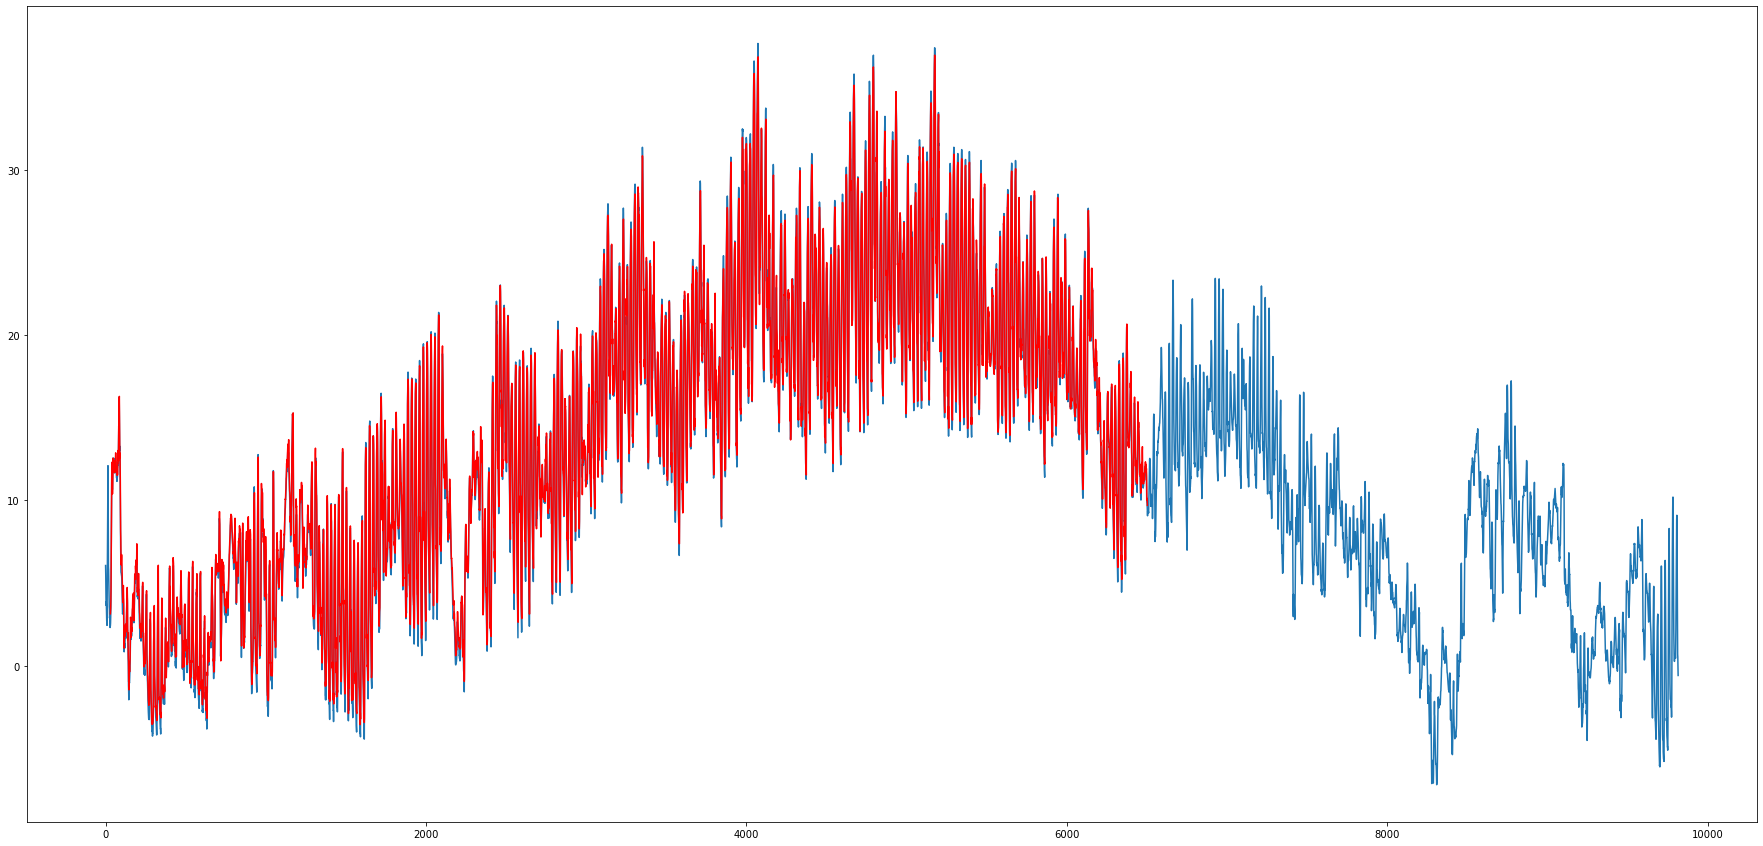

In [98]:
# vẽ đồ thị nhiệt độ
plt.figure(figsize=(31, 15))
plt.plot(df['Basel Temperature [2 m elevation corrected]'].values)
plt.plot(range(look_back, train_size -1), train_predict[:, 0], color='r', label='Huấn luyện')
plt.plot(range(train_size +look_back - val_size -4, len(df)+10), test_predict[:, 0], color='g', label='Kiểm tra')
plt.legend()
plt.show()

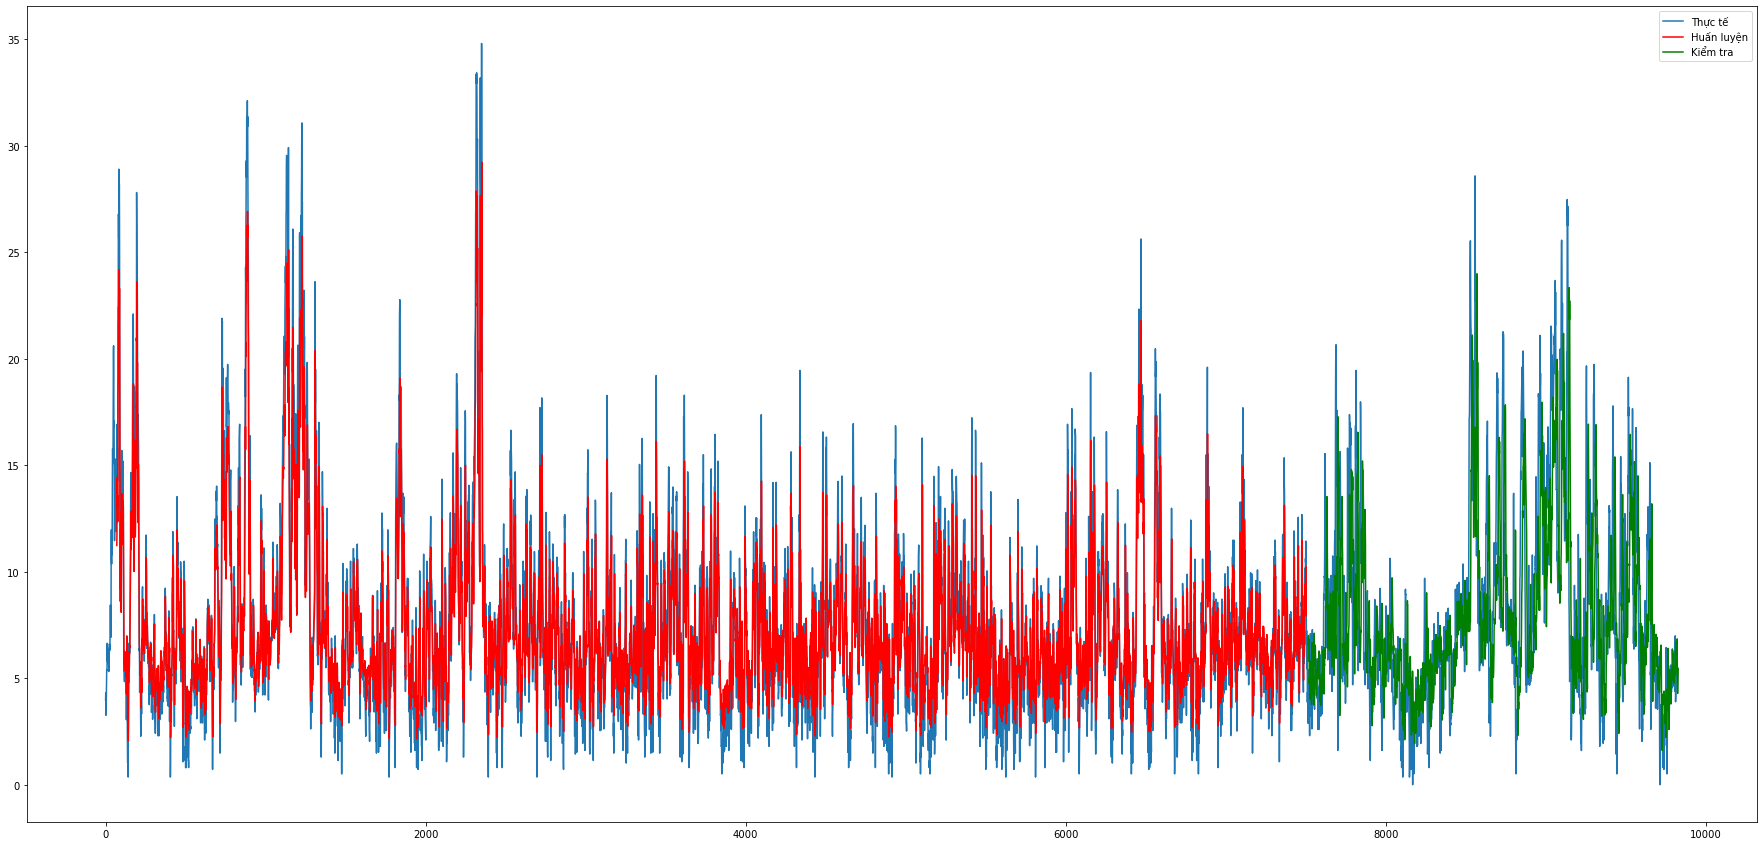

In [66]:
# vẽ đồ thị tốc độ gió
plt.figure(figsize=(31, 15))
plt.plot(df['Basel Wind Speed [10 m]'].values)
plt.plot(range(look_back, train_size -1), train_predict[:, 1], color='r')
plt.plot(range(train_size +look_back -val_size -4 , len(df)+10), test_predict[:, 1], color='g')
plt.legend(['Thực tế', 'Huấn luyện', 'Kiểm tra'])
plt.show()

In [69]:
mse = mean_squared_error(train_predict,Y_train)
print(mse)

2.346493616299144


In [70]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))
val_loss = history.history['val_loss']


Epoch 1/10
233/233 [==============================] - 5s 21ms/step - loss: 41.2994
Epoch 2/10
233/233 [==============================] - 5s 21ms/step - loss: 44.1613
Epoch 3/10
233/233 [==============================] - 5s 21ms/step - loss: 46.5374
Epoch 4/10
233/233 [==============================] - 5s 22ms/step - loss: 35.6232
Epoch 5/10
233/233 [==============================] - 5s 21ms/step - loss: 32.2943
Epoch 6/10
233/233 [==============================] - 5s 23ms/step - loss: 29.7301
Epoch 7/10
233/233 [==============================] - 5s 22ms/step - loss: 27.8747
Epoch 8/10
233/233 [==============================] - 5s 23ms/step - loss: 27.0647
Epoch 9/10
233/233 [==============================] - 5s 22ms/step - loss: 25.6461
Epoch 10/10
233/233 [==============================] - 5s 21ms/step - loss: 24.8456


KeyError: 'val_loss'

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()